In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyrootutils

base_path = pyrootutils.setup_root(
    search_from=".",
    indicator=[".gitignore"],
    project_root_env_var=True,  # set the PROJECT_ROOT environment variable to root directory
    dotenv=True,  # load environment variables from .env if exists in root directory
    pythonpath=True,  # add root directory to the PYTHONPATH (helps with imports)
    cwd=True,  # change current working directory to the root directory (helps with filepaths)
)

import sys
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import json
import wandb
import matplotlib
import matplotlib as mpl
from itertools import combinations
import os
import shutil

from src.utils.metrics import *
from src.data.utils import *
from src.utils.eval import *
from src.utils.wandb import *
from src.utils.data_paths_valid import *

## Define data paths

In [3]:
sc_paths, st_paths, simulation_paths, experiment_paths = get_paths_for_processing(
    base_path, data_dir="data", use_old_experiment_paths=True
)
dataset_names_orig = get_dataset_names()
dataset_map = get_dataset_map(experiment_paths)
dataset_path_map = get_dataset_path_map(st_paths)


## Analyze ablation results

In [5]:
project = "multi-channel-gnn"
baseline_tag = "latestv2-switched"
ablation_tag = "ablation-hard"
dataset_filter = dataset_names_orig[-8:-2]
print(dataset_filter)

['slideSeqv2-kidney-2a (sc. ref.)', 'slideSeqv2-kidney-4b (sc. ref.)', 'seqFISH-heart-1 (switched)', 'seqFISH-heart-2 (switched)', 'MERFISH-hypothalamus-0 (switched)', 'MERFISH-hypothalamus-1 (switched)']


### Performance with different channels

Loaded 12 runs


100%|██████████| 12/12 [00:03<00:00,  3.10it/s]


Number of methods: 12


100%|██████████| 19/19 [00:13<00:00,  1.38it/s]


Number of special names: 1


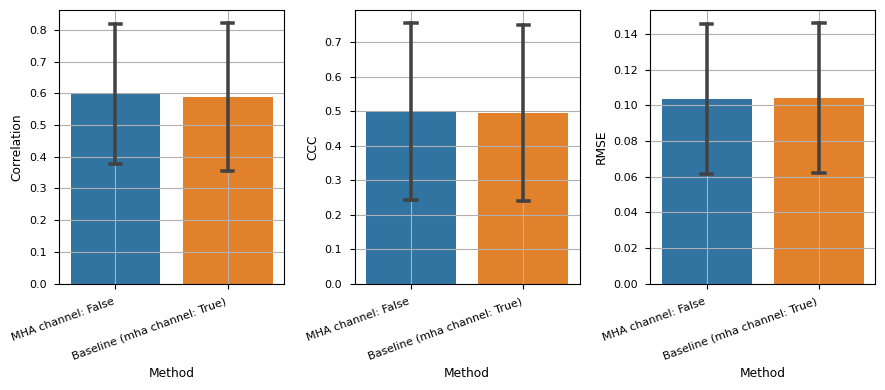

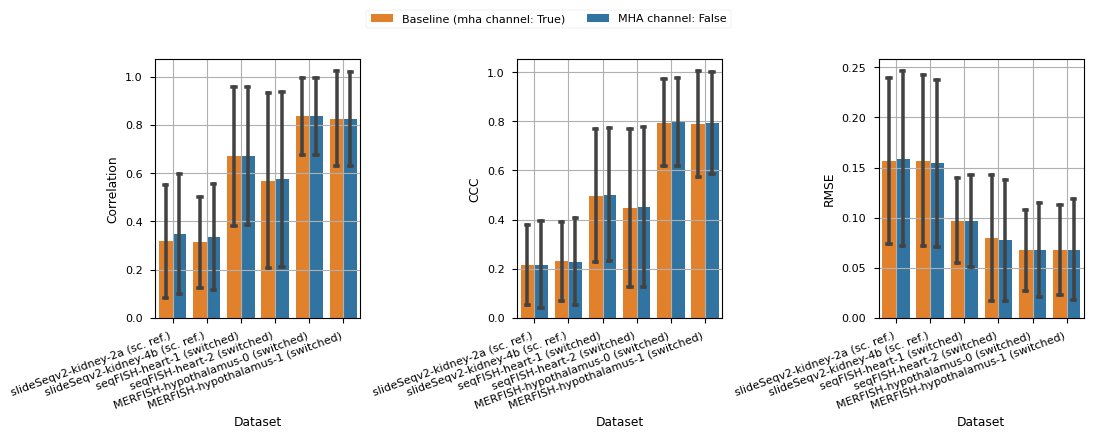

,Correlation,RMSE,CCC,Correlation (samplewise),RMSE (samplewise),CCC (samplewise),JSD
Method,,,,,,,
MHA channel: False,0.598081,0.103825,0.498479,0.708213,0.112863,0.633172,0.189061
Baseline (mha channel: True),0.588232,0.104241,0.495646,0.704483,0.112174,0.623244,0.188926


In [10]:
name = "MHA channel"
id_values = {
    "net/encoder_kwargs/mha_channel": [False],
}
save_path = f"./figures/ablation/{ablation_tag}_mha_channel.png"
result_df = evaluation_pipeline(
    dataset_map,
    dataset_path_map,
    id_values,
    name,
    baseline_tag=baseline_tag,
    ablation_tag=ablation_tag,
    project=project,
    metrics=["Correlation", "CCC", "RMSE"],
    dataset_filter=dataset_filter,
    # save_path=save_path,
    # add_line_plot=True,
    use_bar_plot=True,
    return_all_dfs=False,
    show=False,
)
result_df


### Performance for different beta values